######

## <div align="center"> TUGAS LAB IS388 Data Analysis </div>

## <div align="center"> WEEK 13: Evaluation and Deployment</div>

#### <div align="center"> Semester Ganjil 2025/2026 </div>
---

In [ ]:
import datetime
import uuid

studentName = "Farrelius Kevin"
studentNIM = "00000081783"
studentClass = "IS388 - F"

In [ ]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(studentName))
print("NIM: \t\t{}".format(studentNIM))
print("Class: \t\t{}".format(studentClass))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Farrelius Kevin
NIM: 		00000081783
Class: 		IS388 - F
Start: 		2025-12-05 18:14:57.245368
Device ID: 	4e39a13e-d206-11f0-b1c4-0242ac1c000c


## <div align="center">**Implementasi Pembelajaran Metrik Menggunakan Siamese-EfficientNetV2 untuk Klasifikasi Kelainan Ginjal pada Citra CT Scan**</div>

### <div align="center">**Proyek Akhir IS388 - Data Analysis**</div>

#### **Kelompok 02**
- Anastasya Br Sidebang (00000083222)
- Brightly Virya (00000068227)
- Farrelius Kevin (00000081783)
- Ignatius Steven (00000070642)
- Malvin Wijaya (00000080948)
- Silvi Dian Pramana (00000070642)

---


## **Persiapan Import Dataset Kidney CT Scan - Kaggle**

### **1. Import Library**

In [ ]:
from google.colab import files
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from collections import Counter
import hashlib

2. Upload File `kaggle.json`

In [ ]:
#files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

3. Download Dataset `ct-kidney-dataset-normal-cyst-tumor-and-stone`

In [ ]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
License(s): copyright-authors
 98% 1.49G/1.52G [00:08<00:00, 152MB/s]
100% 1.52G/1.52G [00:08<00:00, 183MB/s]


4. Unzip Dataset

In [ ]:
!unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip -d kidney_ct_dataset

5. Simpan Dataset yang Telah Unzip

In [ ]:
for root, dirs, files in os.walk("kidney_ct_dataset"):
    print(root, len(files), "files")

kidney_ct_dataset 1 files
kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone 0 files
kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone 0 files
kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone 1377 files
kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst 3709 files
kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal 5077 files
kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor 2283 files


6. Mengecek Direktori / Folder Dalam Dataset (Per Kelas)

In [ ]:
print(os.listdir("/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/"))


['Stone', 'Cyst', 'Normal', 'Tumor']


6. Membaca Dataset dari Path Folder

/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone


In [ ]:
base_path = "/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"

classes = ["Normal", "Cyst", "Tumor", "Stone"]


## **Data Understanding**

Setelah menyiapkan dataset yang telah diunduh dan berhasil untuk dibaca, proses berikutnya adalah **Data Understanding** untuk memahami & menilai kualitas awal dataset CT-Kidney.

---

### **1. Distribusi Jumlah Gambar/File per Kelas**

In [ ]:
file_counts = {}

for cls in classes:
    class_path = os.path.join(base_path, cls)
    file_counts[cls] = len(os.listdir(class_path))

df_file_counts = pd.DataFrame(
    list(file_counts.items()),
    columns=["Class", "Jumlah Gambar"]
)

print("Distribusi Data Gambar per Kelas Dalam Dataset")
df_file_counts


Distribusi Data Gambar per Kelas Dalam Dataset


,Class,Jumlah Gambar
0,Normal,5077
1,Cyst,3709
2,Tumor,2283
3,Stone,1377


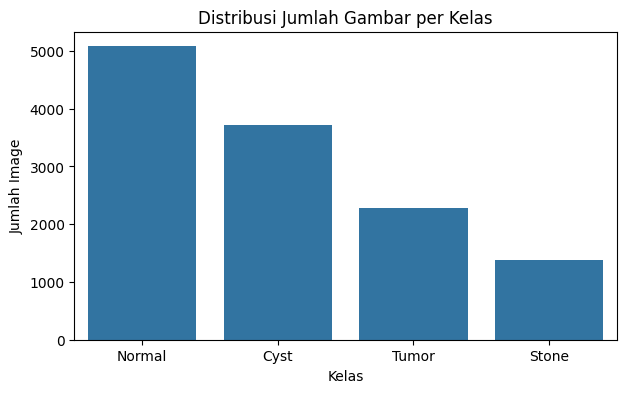

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=list(file_counts.keys()), y=list(file_counts.values()))
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.ylabel("Jumlah Image")
plt.xlabel("Kelas")
plt.show()


### **2. Menampilkan Sample Image Tiap Kelas**

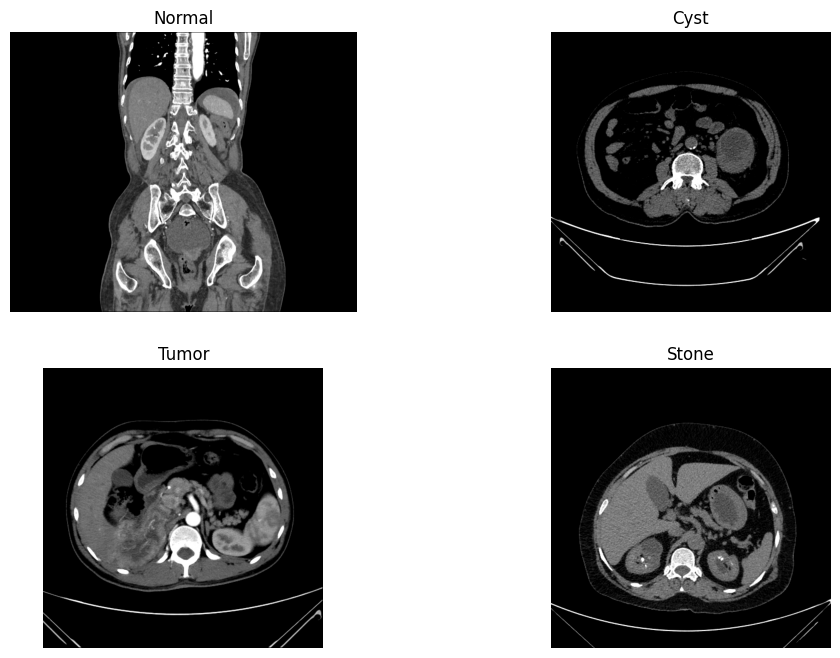

In [ ]:
plt.figure(figsize=(12,8))

for i, cls in enumerate(classes):
    class_path = os.path.join(base_path, cls)
    sample_img = os.listdir(class_path)[0]
    img = cv2.imread(os.path.join(class_path, sample_img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()

### **3. Cek Format Seluruh File Gambar**

In [ ]:
all_formats = []
formats_per_class = {}

for cls in classes:
    class_path = os.path.join(base_path, cls)
    exts = [f.split(".")[-1].lower() for f in os.listdir(class_path)]

    all_formats.extend(exts)
    formats_per_class[cls] = Counter(exts)

print("=== Format Semua File ===")
df_all_formats = pd.DataFrame(
    Counter(all_formats).items(),
    columns=["Extension", "Count"]
)
display(df_all_formats)

print("\n=== Format File per Kelas ===")
df_formats_per_class = []

for cls in classes:
    for ext, count in formats_per_class[cls].items():
        df_formats_per_class.append({
            "Class": cls,
            "Extension": ext,
            "Count": count
        })

df_formats_per_class = pd.DataFrame(df_formats_per_class)
display(df_formats_per_class)


=== Format Semua File ===


,Extension,Count
0,jpg,12446



=== Format File per Kelas ===


,Class,Extension,Count
0,Normal,jpg,5077
1,Cyst,jpg,3709
2,Tumor,jpg,2283
3,Stone,jpg,1377


### **4. Cek Duplikasi Gambar (Hash)**

In [ ]:
hashes = {}
duplicates = []

for cls in classes:
    class_path = os.path.join(base_path, cls)
    for file in os.listdir(class_path):
        file_path = os.path.join(class_path, file)
        try:
            with open(file_path, "rb") as f:
                img_hash = hashlib.md5(f.read()).hexdigest()
        except:
            continue

        if img_hash in hashes:
            duplicates.append((file_path, hashes[img_hash]))
        else:
            hashes[img_hash] = file_path

duplicates[:10], len(duplicates)


([('/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1655).jpg',
   '/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1730).jpg'),
  ('/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1641).jpg',
   '/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1716).jpg'),
  ('/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1724).jpg',
   '/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1649).jpg'),
  ('/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1620).jp

In [ ]:
dup_classes = [d[0].split("/")[-2] for d in duplicates]
df_dup_class = pd.DataFrame({"Kelas": dup_classes})
df_dup_class = df_dup_class.value_counts().reset_index(name="Data Duplikat")

print("=== Jumlah Data Duplikat Pada Kelas ===")
df_dup_class


=== Jumlah Data Duplikat Pada Kelas ===


,Kelas,Data Duplikat
0,Cyst,425
1,Normal,75
2,Stone,17


### **5. Cek Gambar Rusak / Corrupted**

In [ ]:
print("=== Cek File Rusak ===")

corrupt_files = []

for cls in classes:
    folder = os.path.join(base_path, cls)
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        # Pemeriksaaan PIL.Image.verify()
        try:
            img = Image.open(path)
            img.verify()
        except:
            corrupt_files.append(path)

corrupt_files


=== Cek File Rusak ===


[]

### **6. Cek Resolusi Semua Gambar**

In [ ]:
image_shapes = []
resolutions = {cls: [] for cls in classes}

for cls in classes:
    class_path = os.path.join(base_path, cls)
    for root, dirs, files in os.walk(class_path):
        for file in files:
            img_path = os.path.join(root, file)
            try:
                img_pil = Image.open(img_path)
                image_shapes.append(img_pil.size)
                img_cv = cv2.imread(img_path)
                if img_cv is not None:
                    h, w = img_cv.shape[:2]
                    resolutions[cls].append((w, h))
            except:
                pass

In [ ]:
resolutions

{'Normal': [(869, 702),
  (1060, 858),
  (512, 512),
  (512, 512),
  (787, 636),
  (804, 651),
  (824, 667),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (791, 640),
  (758, 614),
  (512, 512),
  (892, 722),
  (828, 670),
  (755, 611),
  (828, 670),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (840, 680),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (758, 614),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (787, 636),
  (808, 654),
  (512, 512),
  (790, 640),
  (512, 512),
  (869, 702),
  (512, 512),
  (512, 512),
  (785, 634),
  (840, 680),
  (512, 512),
  (790, 640),
  (512, 512),
  (512, 512),
  (1060, 858),
  (512, 512),
  (512, 512),
  (787, 636),
  (512, 512),
  (892, 722),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 512),
  (512, 

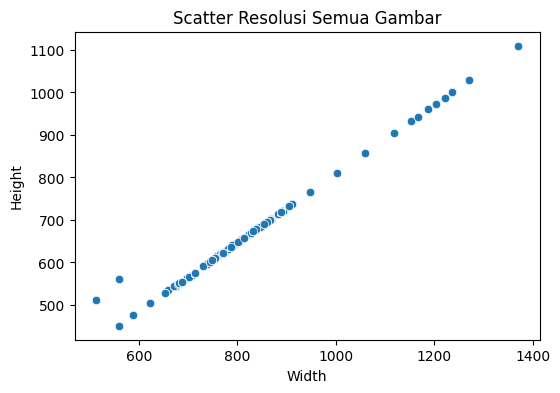

In [ ]:
all_w = [w for cls in classes for (w, h) in resolutions[cls]]
all_h = [h for cls in classes for (w, h) in resolutions[cls]]

plt.figure(figsize=(6,4))
sns.scatterplot(x=all_w, y=all_h)
plt.title("Scatter Resolusi Semua Gambar")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

### **7. Cek Orientasi Gambar (Portrait vs Landscape)**

untuk melihat apakah dataset punya variasi orientasi.

In [ ]:
print("=== Cek Orientasi Gambar ===")

orientation = {cls: {"portrait": 0, "landscape": 0, "square": 0} for cls in classes}

for cls in classes:
    folder = os.path.join(base_path, cls)
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img = cv2.imread(path)
        if img is not None:
            h, w = img.shape[:2]
            if h > w:
                orientation[cls]["portrait"] += 1
            elif w > h:
                orientation[cls]["landscape"] += 1
            else:
                orientation[cls]["square"] += 1


df_orientation = pd.DataFrame.from_dict(orientation, orient='index').reset_index()
df_orientation.columns = ["Class", "Portrait", "Landscape", "Square"]
df_orientation


=== Cek Orientasi Gambar ===


,Class,Portrait,Landscape,Square
0,Normal,0,1803,3274
1,Cyst,0,1462,2247
2,Tumor,0,943,1340
3,Stone,0,514,863


### **8. Distribusi Intensitas Piksel Per Kelas**

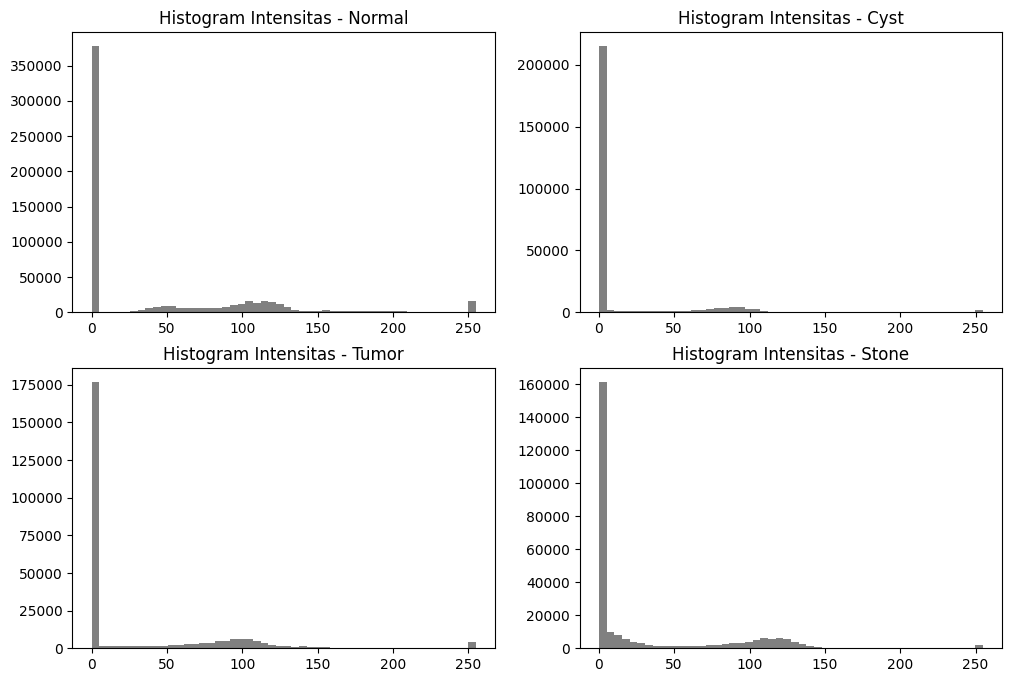

In [ ]:
plt.figure(figsize=(12,8))

for i, cls in enumerate(classes):
    class_path = os.path.join(base_path, cls)
    sample_img = os.listdir(class_path)[0]
    img = cv2.imread(os.path.join(class_path, sample_img), cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 2, i+1)
    plt.hist(img.ravel(), bins=50, color='gray')
    plt.title(f"Histogram Intensitas - {cls}")

plt.show()


### **9. Distribusi Brightness per Kelas**

Untuk meliihat apakah ada bias brightness karena bisa mempengaruhi pemodelan.



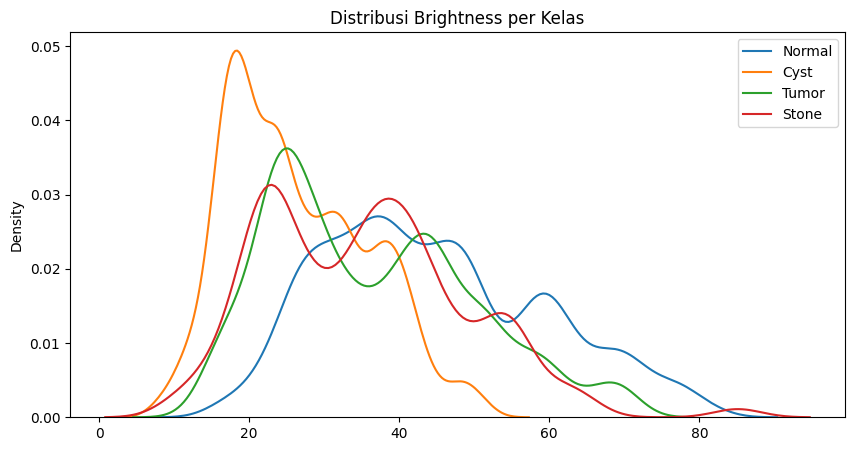

In [ ]:
brightness_stats = {}

for cls in classes:
    folder = os.path.join(base_path, cls)
    means = []

    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            means.append(img.mean())

    brightness_stats[cls] = means

plt.figure(figsize=(10,5))
for cls in classes:
    sns.kdeplot(brightness_stats[cls], label=cls)
plt.title("Distribusi Brightness per Kelas")
plt.legend()
plt.show()


### **10. Distribusi Kontras per Kelas**

In [ ]:
contrast_stats = {cls: [] for cls in classes}

for cls in classes:
    folder = os.path.join(base_path, cls)
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            contrast_stats[cls].append(img.std())

df_contrast = pd.DataFrame([
    {"Class": cls, "Mean Contrast": np.mean(values), "Std Contrast": np.std(values)}
    for cls, values in contrast_stats.items()
])

print("=== Cek Distribusi Kontras per Kelas ===")
df_contrast


=== Cek Distribusi Kontras per Kelas ===


,Class,Mean Contrast,Std Contrast
0,Normal,65.169084,10.113875
1,Cyst,49.125383,10.251121
2,Tumor,60.351507,11.750052
3,Stone,55.008137,10.956726


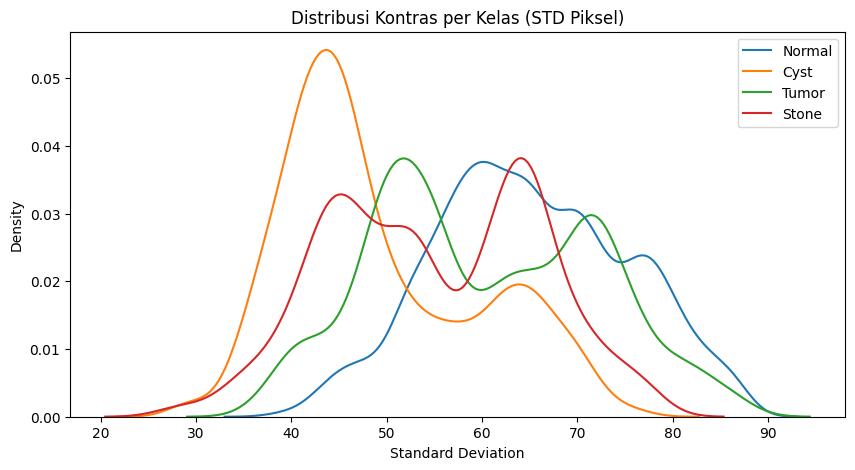

In [ ]:
plt.figure(figsize=(10,5))
for cls in classes:
    sns.kdeplot(contrast_stats[cls], label=cls)
plt.title("Distribusi Kontras per Kelas (STD Piksel)")
plt.xlabel("Standard Deviation")
plt.ylabel("Density")
plt.legend()
plt.show()


## **Data preprocessing/Preparation**

Setelah memahami isi dan kualitas data mentah serta mendeteksi kekurangan data mentah pada Data Preparation, maka proses berikutnya adalah Data Preparation, yaitu melakukan pembersihan data sesuai dengan rekomendasi/permasalahan yang telah dideteksi & dijelaskan pada Data Preparation & EDA sebelumnya.



### **1. Membuat Struktur Direktori Folder Dataset Bersih**

In [ ]:
RAW_PATH = "/content/kidney_ct_dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
CLEAN_PATH = "/content/kidney_clean"

classes = ["Normal", "Cyst", "Tumor", "Stone"]

# Membuat direktori baru untuk dataset bersih
for cls in classes:
    os.makedirs(os.path.join(CLEAN_PATH, cls), exist_ok=True)

print("Direktori kidney_clean berhasil dibuat.")

Direktori kidney_clean berhasil dibuat.


### **2. Penanganan Data Duplikat dan Penyalinan Data Unik menggunakan `Hashing MD5`**

Data duplikat dengan total 517 data yang telah dideteksi menggunakan Hashing MD5 pada Data Preparation sebelumnya akan dihapus sehingga tidak ada data duplikat pada **`CLEAN_PATH = Kidney_Clean`**.

In [ ]:
from tqdm import tqdm

# Inisialisasi Variabel Hash & Duplikat
hashes = {}
duplicate_count = 0

# Looping Melalui Setiap Kelas Data
for cls in classes:
    class_path = os.path.join(RAW_PATH, cls)
    clean_class_path = os.path.join(CLEAN_PATH, cls)

    # Looping Melalui Setiap FIle Dalam Kelas
    for fname in tqdm(os.listdir(class_path), desc=f"Checking Class {cls}"):
        old_path = os.path.join(class_path, fname)
        # Deteksi Unik / Perhitungan Hash
        try:
            with open(old_path, "rb") as f:
                img_hash = hashlib.md5(f.read()).hexdigest()
        except:
            continue
        # Proses Penanganan Data Duplikat
        if img_hash in hashes:
            duplicate_count += 1
            continue
        else:
            hashes[img_hash] = old_path
            shutil.copy(old_path, clean_class_path)

duplicate_count


Checking Class Stone: 100%|██████████| 1377/1377 [00:00<00:00, 1682.37it/s]


517

#### **a. Deteksi Ulang Data Duplikat Setelah Penanganan**

Tujuan : Memastikan tidak ada data duplikat setelah penanganan pada Folder `Kidney_Clean`

In [ ]:
hashes = {}
duplicates = []

for cls in classes:
    class_path = os.path.join(CLEAN_PATH, cls)
    for file in tqdm(os.listdir(class_path), desc=f"Verifikasi Kelas {cls}"):
        file_path = os.path.join(class_path, file)
        try:
            with open(file_path, "rb") as f:
                img_hash = hashlib.md5(f.read()).hexdigest()
        except:
            continue
        if img_hash in hashes:
            duplicates.append((file_path, hashes[img_hash]))
        else:
            hashes[img_hash] = file_path

Verifikasi Kelas Stone: 100%|██████████| 1360/1360 [00:00<00:00, 3236.47it/s]


In [ ]:
print(f"Total File Duplikat (Setelah Pembersihan): {len(duplicates)}")
print("10 Pasangan Duplikat Pertama (jika ada):")
print(duplicates[:10])

Total File Duplikat (Setelah Pembersihan): 0
10 Pasangan Duplikat Pertama (jika ada):
[]


#### **b. Menampilkan Jumlah Data Setelah Penghapusan Data Duplikat**

Tujuan : Sebagai validasi bahwa data duplikat benar-benar dihapus dan tidak ada di folder bersih.

In [ ]:
# Menghitung Data Per Kelas
def count_data(base_path, classes):
    counts = {}
    for cls in classes:
        class_path = os.path.join(base_path, cls)
        if os.path.exists(class_path):
            file_count = len([name for name in os.listdir(class_path)
                              if os.path.isfile(os.path.join(class_path, name))])
            counts[cls] = file_count
        else:
            counts[cls] = 0
    return counts

# Hitung Data Mentah
raw_counts = count_data(RAW_PATH, classes)
df_raw = pd.DataFrame(raw_counts.items(), columns=['Kelas', 'RAW_PATH (Data Mentah)'])
df_raw['RAW_PATH (Data Mentah) Total'] = df_raw['RAW_PATH (Data Mentah)'].sum()

# Hitung Data Bersih
clean_counts = count_data(CLEAN_PATH, classes)
df_clean = pd.DataFrame(clean_counts.items(), columns=['Kelas', 'CLEAN_PATH (Data Bersih)'])
df_clean['CLEAN_PATH (Data Bersih) Total'] = df_clean['CLEAN_PATH (Data Bersih)'].sum()

df_comparison = pd.merge(df_raw, df_clean, on='Kelas')

# Hitung Duplikat yang Dihapus
df_comparison['Duplikat Dihilangkan'] = df_comparison['RAW_PATH (Data Mentah)'] - df_comparison['CLEAN_PATH (Data Bersih)']

df_final = df_comparison[['Kelas',
                          'RAW_PATH (Data Mentah)',
                          'CLEAN_PATH (Data Bersih)',
                          'Duplikat Dihilangkan']]

# Menampilkan Hasil
total_raw = df_comparison['RAW_PATH (Data Mentah)'].sum()
total_clean = df_comparison['CLEAN_PATH (Data Bersih)'].sum()
total_removed = total_raw - total_clean

print("\n=== Perbandingan Jumlah Data Setelah Hapus Duplikat ===")
print(f"Total Data Awal (RAW_PATH): {total_raw}")
print(f"Total Data Akhir (CLEAN_PATH): {total_clean}")
print(f"Total Duplikat yang Dihapus: {total_removed}")

print("\n=== Tabel Perbandingan Jumlah Data Per Kelas ===")
df_final


=== Perbandingan Jumlah Data Setelah Hapus Duplikat ===
Total Data Awal (RAW_PATH): 12446
Total Data Akhir (CLEAN_PATH): 11929
Total Duplikat yang Dihapus: 517

=== Tabel Perbandingan Jumlah Data Per Kelas ===


,Kelas,RAW_PATH (Data Mentah),CLEAN_PATH (Data Bersih),Duplikat Dihilangkan
0,Normal,5077,5002,75
1,Cyst,3709,3284,425
2,Tumor,2283,2283,0
3,Stone,1377,1360,17


### **3. Normalisasi Dimensi Gambar: Resizing Proporsional dan Padding**

Proses ini bertujuan untuk menstandardisasi semua gambar di direktori bersih `(CLEAN_PATH)` menjadi ukuran target yang seragam.

Metode yang digunakan adalah **Resizing Proporsional** (mengubah ukuran tanpa merusak rasio aspek) yang dikombinasikan dengan **Padding** (menambahkan piksel kosong, biasanya hitam, di sekitar gambar) untuk mengisi sisa ruang hingga mencapai dimensi target.

In [ ]:
TARGET_SIZE = (512, 512)
PADDING_COLOR = (0, 0, 0)

def resize_and_pad(img, target_size, pad_color):
    h, w = img.shape[:2]
    tw, th = target_size

    # Hitung rasio untuk resizing
    ratio = min(tw/w, th/h)
    new_w = int(w * ratio)
    new_h = int(h * ratio)

    # Resizing proporsional
    img_resized = cv2.resize(img, (new_w, new_h),
                             interpolation=cv2.INTER_LINEAR)

    # Hitung padding yang dibutuhkan
    delta_w = tw - new_w
    delta_h = th - new_h

    # Hitung padding di sisi atas/bawah dan kiri/kanan (pusat gambar)
    top, bottom = delta_h//2, delta_h - (delta_h//2)
    left, right = delta_w//2, delta_w - (delta_w//2)

    # Terapkan padding (border)
    img_padded = cv2.copyMakeBorder(
        img_resized, top, bottom, left, right,
        cv2.BORDER_CONSTANT, value=pad_color
    )

    return img_padded

for cls in classes:
    class_path = os.path.join(CLEAN_PATH, cls)
    for fname in tqdm(os.listdir(class_path),
                      desc=f"Resizing & Padding Kelas {cls}"):
        fpath = os.path.join(class_path, fname)

        img = cv2.imread(fpath)
        if img is None:
            os.remove(fpath)
            continue

        img_standardized = resize_and_pad(img, TARGET_SIZE, PADDING_COLOR)

        # Simpan gambar yang telah di normalisasi dimensi (menimpa file lama)
        cv2.imwrite(fpath, img_standardized)

Resizing & Padding Kelas Stone: 100%|██████████| 1360/1360 [00:06<00:00, 208.34it/s]


#### **a. Menampilkan Sample Gambar Sebelum & Sesudah Normalisasi Dimensi**

Tujuan: Melihat Perbedaan Gambar Sebelum & Sesudah Normalisasi Dimensi. Sample diambil dari gambar yang sama.

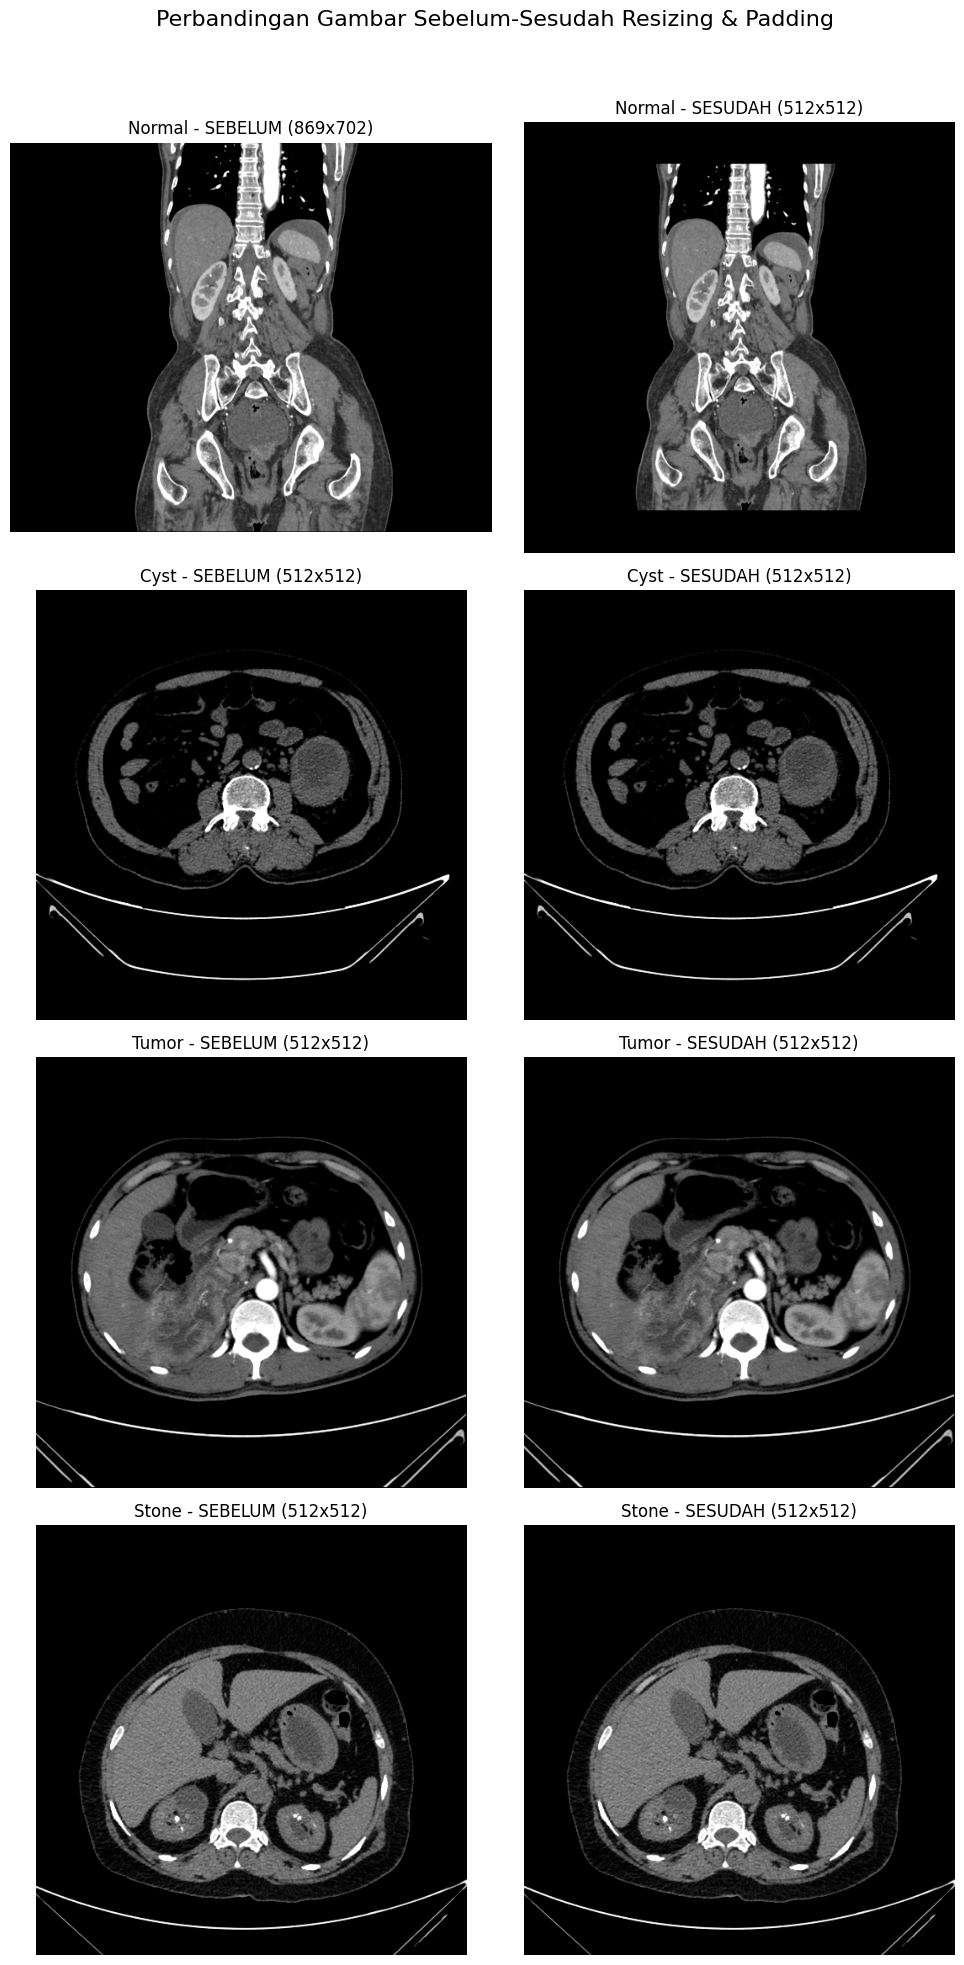

In [ ]:
sample_files = {}

for cls in classes:
    class_path = os.path.join(CLEAN_PATH, cls)
    try:
        sample_fname = os.listdir(class_path)[0]
        sample_files[cls] = os.path.join(class_path, sample_fname)
    except IndexError:
        print(f"Peringatan: Kelas {cls} kosong.")
        sample_files[cls] = None

# Pengambilan & Penampilan Gambar
def get_original_path(clean_path):
    fname = os.path.basename(clean_path)
    cls_name = os.path.basename(os.path.dirname(clean_path))

    return os.path.join(RAW_PATH, cls_name, fname)

# Menampilkan Hasil Perbandingan
def display_comparison(sample_files):
    fig, axes = plt.subplots(len(sample_files), 2, figsize=(10, 5 * len(sample_files)))
    plt.suptitle("Perbandingan Gambar Sebelum-Sesudah Resizing & Padding", fontsize=16)

    for i, (cls, clean_path) in enumerate(sample_files.items()):
        if clean_path is None:
            continue
        raw_path = get_original_path(clean_path)
        img_raw = cv2.imread(raw_path)
        img_clean = cv2.imread(clean_path)

        # Plot Gambar Asli (Sebelum)
        axes[i, 0].imshow(cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f"{cls} - SEBELUM ({img_raw.shape[1]}x{img_raw.shape[0]})")
        axes[i, 0].axis('off')

        # Plot Gambar Hasil (Sesudah)
        axes[i, 1].imshow(cv2.cvtColor(img_clean, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title(f"{cls} - SESUDAH ({img_clean.shape[1]}x{img_clean.shape[0]})")
        axes[i, 1].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

display_comparison(sample_files)

#### **b. Scatterplot Resolusi Gambar CLEAN_PATH**

Tujuan: Memastikan semua gambar memiliki resolusi yang sama & tidak ada yang berbeda.

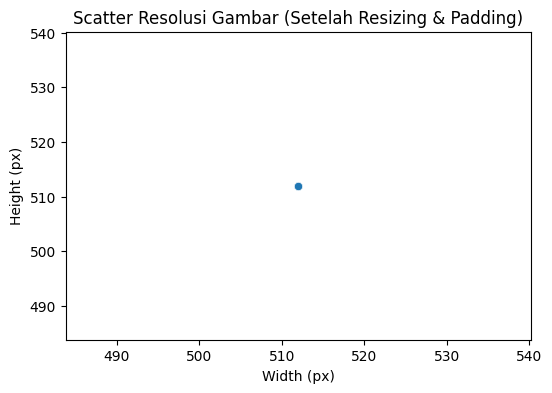

In [ ]:
# Inisialisasi struktur data
resolutions = {cls: [] for cls in classes}

# Mengumpulkan Resolusi dari CLEAN_PATH Setelah Normalisasi Dimensi
for cls in classes:
    class_path = os.path.join(CLEAN_PATH, cls)
    for roots, dirs, files in os.walk(class_path):
        for file in files:
            img_path = os.path.join(roots, file)
            try:
                img_cv = cv2.imread(img_path)
                if img_cv is not None:
                    h, w = img_cv.shape[:2]
                    resolutions[cls].append((w, h))
            except:
                pass

all_w = [w for cls in classes for (w, h) in resolutions[cls]]
all_h = [h for cls in classes for (w, h) in resolutions[cls]]

plt.figure(figsize=(6, 4))
sns.scatterplot(x=all_w, y=all_h)
plt.title("Scatter Resolusi Gambar (Setelah Resizing & Padding)")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.show()

#### **C. Cek Orientasi Gambar CLEAN_PATH**

Tujuan: Memastikan semua gambar memiliki orientasi yang sama & tidak ada yang berbeda setelah melakukan resize & Padding.

In [ ]:
print("=== Cek Orientasi Gambar pada CLEAN_PATH ===")

orientation_clean = {cls: {"portrait": 0, "landscape": 0, "square": 0} for cls in classes}

for cls in classes:
    folder = os.path.join(CLEAN_PATH, cls)
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img = cv2.imread(path)

        if img is not None:
            h, w = img.shape[:2]

            if h > w:
                orientation_clean[cls]["portrait"] += 1
            elif w > h:
                orientation_clean[cls]["landscape"] += 1
            else:
                orientation_clean[cls]["square"] += 1

df_orientation_clean = pd.DataFrame.from_dict(orientation_clean, orient='index').reset_index()
df_orientation_clean.columns = ["Class", "Portrait", "Landscape", "Square"]

df_orientation_clean


=== Cek Orientasi Gambar pada CLEAN_PATH ===


,Class,Portrait,Landscape,Square
0,Normal,0,0,5002
1,Cyst,0,0,3284
2,Tumor,0,0,2283
3,Stone,0,0,1360


### **4. Cek File Rusak Pada CLEAN_PATH**

Tujuan : Memastikan seluruh file data gambar pada `Folder data bersih (Kidney_Clean)/CLEAN_PATH` tidak ada yang rusak.

In [ ]:
print("=== Cek File Rusak Pada CLEAN_PATH ===")

corrupt_files = []

for cls in classes:
    folder = os.path.join(CLEAN_PATH, cls)
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        # Pemeriksaaan PIL.Image.verify()
        try:
            img = Image.open(path)
            img.verify()
        except:
            corrupt_files.append(path)

corrupt_files


=== Cek File Rusak Pada CLEAN_PATH ===


[]

### **4. Cek Format File Pada CLEAN_PATH**

In [ ]:
all_formats = []
formats_per_class = {}

for cls in classes:
    class_path = os.path.join(CLEAN_PATH, cls)
    exts = [f.split(".")[-1].lower() for f in os.listdir(class_path)]

    all_formats.extend(exts)
    formats_per_class[cls] = Counter(exts)

print("=== Format Semua File CLEAN_PATH ===")
df_all_formats = pd.DataFrame(
    Counter(all_formats).items(),
    columns=["Extension", "Count"]
)
display(df_all_formats)

print("\n=== Format File per Kelas ===")
df_formats_per_class = []

for cls in classes:
    for ext, count in formats_per_class[cls].items():
        df_formats_per_class.append({
            "Class": cls,
            "Extension": ext,
            "Count": count
        })

df_formats_per_class = pd.DataFrame(df_formats_per_class)
display(df_formats_per_class)


=== Format Semua File CLEAN_PATH ===


,Extension,Count
0,jpg,11929



=== Format File per Kelas ===


,Class,Extension,Count
0,Normal,jpg,5002
1,Cyst,jpg,3284
2,Tumor,jpg,2283
3,Stone,jpg,1360


### **6. Distribusi Data CLEAN_PATH** Setelah Pembersihan

#### **a. Distribusi Data CLEAN_PATH**

In [ ]:
file_counts = {}

for cls in classes:
    class_path = os.path.join(CLEAN_PATH, cls)
    file_counts[cls] = len(os.listdir(class_path))

df_file_counts = pd.DataFrame(
    list(file_counts.items()),
    columns=["Class", "Distribusi Data"]
)

print("=== Distribusi Data CLEAN_PATH ===")
df_file_counts

=== Distribusi Data CLEAN_PATH ===


,Class,Distribusi Data
0,Normal,5002
1,Cyst,3284
2,Tumor,2283
3,Stone,1360


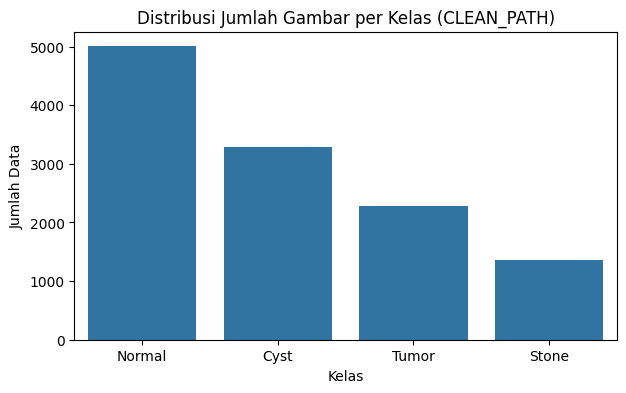

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=list(file_counts.keys()), y=list(file_counts.values()))
plt.title("Distribusi Jumlah Gambar per Kelas (CLEAN_PATH)")
plt.ylabel("Jumlah Data")
plt.xlabel("Kelas")
plt.show()


#### **b. Distribusi Data BASE_PATH vs CLEAN_PATH**

In [ ]:
# Distribusi BASE_PATH
base_file_counts = {}

for cls in classes:
    class_path = os.path.join(base_path, cls)
    base_file_counts[cls] = len(os.listdir(class_path))

df_base = pd.DataFrame(
    list(base_file_counts.items()),
    columns=["Class", "Distribusi BASE_PATH"]
)

# Distribusi CLEAN_PATH
clean_file_counts = {}

for cls in classes:
    class_path = os.path.join(CLEAN_PATH, cls)
    clean_file_counts[cls] = len(os.listdir(class_path))

df_clean = pd.DataFrame(
    list(clean_file_counts.items()),
    columns=["Class", "Distribusi CLEAN_PATH"]
)

df_comparison = pd.merge(df_base, df_clean, on='Class')

print("=== Distribusi Data BASE_PATH vs CLEAN_PATH ===")
df_comparison

=== Distribusi Data BASE_PATH vs CLEAN_PATH ===


,Class,Distribusi BASE_PATH,Distribusi CLEAN_PATH
0,Normal,5077,5002
1,Cyst,3709,3284
2,Tumor,2283,2283
3,Stone,1377,1360


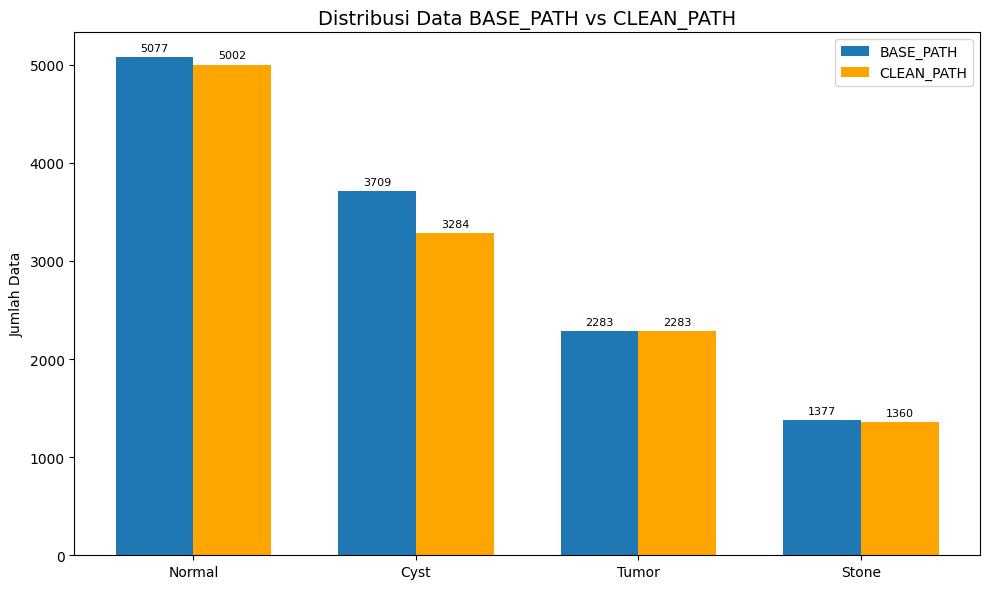

In [ ]:
labels = df_comparison['Class']
raw_counts = df_comparison['Distribusi BASE_PATH']
clean_counts = df_comparison['Distribusi CLEAN_PATH']

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, raw_counts,
                width, label='BASE_PATH')
rects2 = ax.bar(x + width/2, clean_counts,
                width, label='CLEAN_PATH',
                color='orange')
ax.set_ylabel('Jumlah Data')
ax.set_title('Distribusi Data BASE_PATH vs CLEAN_PATH', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

### **Membuat DataFrame path gambar + label**

In [ ]:
print("=== Membuat DataFrame dari CLEAN_PATH ===")

data = []
for cls in classes:
    class_path = os.path.join(CLEAN_PATH, cls)
    for f in os.listdir(class_path):
        filepath = os.path.join(class_path, f)
        data.append({
            "filepath": filepath,
            "label": cls
        })

df_all = pd.DataFrame(data)
print("Jumlah total data:", len(df_all))
df_all.head()


=== Membuat DataFrame dari CLEAN_PATH ===
Jumlah total data: 11929


,filepath,label
0,/content/kidney_clean/Normal/Normal- (1420).jpg,Normal
1,/content/kidney_clean/Normal/Normal- (2064).jpg,Normal
2,/content/kidney_clean/Normal/Normal- (4778).jpg,Normal
3,/content/kidney_clean/Normal/Normal- (4030).jpg,Normal
4,/content/kidney_clean/Normal/Normal- (420).jpg,Normal


### **Split Data (Train / val / test) 70:15:15**

#### **a. Proses Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Train vs (Val+Test) 70:30
df_train, df_temp = train_test_split(
    df_all,
    test_size=0.3,
    stratify=df_all["label"],
    random_state=42
)

# Val vs Test (dari temp) 15:15
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=df_temp["label"],
    random_state=42
)

df_train["split"] = "train"
df_val["split"]   = "val"
df_test["split"]  = "test"

#### **b. Distribusi Data per Split**

In [ ]:
df_splits_clean = pd.concat([df_train, df_val, df_test], ignore_index=True)

print("Distribusi Data per split:")
print(df_splits_clean["split"].value_counts())

Distribusi Data per split:
split
train    8350
test     1790
val      1789
Name: count, dtype: int64


#### **c. Distribusi Data Per Kelas Setelah Split**

In [ ]:
table_split = (
    df_splits_clean
    .groupby(["split", "label"])
    .size()
    .unstack(fill_value=0)
)
table_split

label,Cyst,Normal,Stone,Tumor
split,,,,
test,493,751,204,342
train,2299,3501,952,1598
val,492,750,204,343


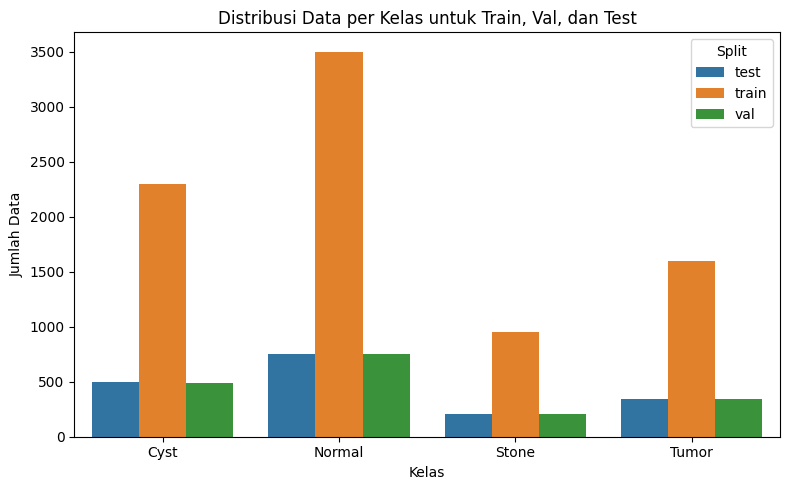

In [ ]:
dist_split = (
    df_splits_clean
    .groupby(["split", "label"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=dist_split,
    x="label",
    y="count",
    hue="split"
)
plt.title("Distribusi Data per Kelas untuk Train, Val, dan Test")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.legend(title="Split")
plt.tight_layout()
plt.show()

In [ ]:
# Simpan sebagai konfigurasi dataset bersih
output_csv = "splits_clean.csv"
df_splits_clean.to_csv(output_csv, index=False)
print(f"File '{output_csv}' berhasil disimpan.")

File 'splits_clean.csv' berhasil disimpan.


## **Data Modelling**

### 1. Import Library

In [ ]:
# PyTorch
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# Torchvision
from torchvision import transforms, models

# Scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

import time
import copy
import random

### 2. Load splits_clean.csv dan pisahkan Train / Val / Test

In [ ]:
CSV_SPLIT_PATH = "/content/splits_clean.csv"

df_all = pd.read_csv(CSV_SPLIT_PATH)

# Pisahkan jadi train, val, test
df_train = df_all[df_all["split"] == "train"].reset_index(drop=True)
df_val   = df_all[df_all["split"] == "val"].reset_index(drop=True)
df_test  = df_all[df_all["split"] == "test"].reset_index(drop=True)

print("=== Jumlah data per split ===")
print("Train :", len(df_train))
print("Val   :", len(df_val))
print("Test  :", len(df_test))

print("\nDistribusi label di TRAIN (imbalanced):")
print(df_train["label"].value_counts())

print("\nDistribusi label di VAL:")
print(df_val["label"].value_counts())

print("\nDistribusi label di TEST:")
print(df_test["label"].value_counts())


=== Jumlah data per split ===
Train : 8350
Val   : 1789
Test  : 1790

Distribusi label di TRAIN (imbalanced):
label
Normal    3501
Cyst      2299
Tumor     1598
Stone      952
Name: count, dtype: int64

Distribusi label di VAL:
label
Normal    750
Cyst      492
Tumor     343
Stone     204
Name: count, dtype: int64

Distribusi label di TEST:
label
Normal    751
Cyst      493
Tumor     342
Stone     204
Name: count, dtype: int64


### 3. Tentukan Skenario Pemodelan

In [ ]:
SCENARIO = 1

if SCENARIO == 1:
    print("[SKENARIO 1] Menggunakan TRAIN imbalanced")
    df_train_use = df_train.copy()

elif SCENARIO == 2:
    print("\n[SKENARIO 2] Menggunakan TRAIN yang Balanced")

    counts = df_train["label"].value_counts()
    min_count = counts.min()
    print("Jumlah per kelas sebelum undersampling:")
    print(counts)
    print("\nSetelah undersampling tiap kelas =", min_count)

    df_train_use = (
        df_train
        .groupby("label")
        .sample(n=min_count, random_state=42)
        .reset_index(drop=True)
    )

print("\nDistribusi TRAIN yang dipakai (df_train_use):")
print(df_train_use["label"].value_counts())


[SKENARIO 1] Menggunakan TRAIN imbalanced

Distribusi TRAIN yang dipakai (df_train_use):
label
Normal    3501
Cyst      2299
Tumor     1598
Stone      952
Name: count, dtype: int64


### 4. Data Augmentation, Transformasi, Label Encoding

#### A. Data Augmentation untuk Data Train

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

#### B. Transform Data Validation / Test

In [ ]:
eval_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225]),
])

#### C. Label Encoding

In [ ]:
label2idx = {
    "Normal": 0,
    "Cyst"  : 1,
    "Tumor" : 2,
    "Stone" : 3,
}
idx2label = {v: k for k, v in label2idx.items()}

### 5. Membuat Custom Siamese Dataset

#### A. Membuat Custom Dataset (KidneyDataset)

In [ ]:
class KidneyDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["filepath"]
        label_str = row["label"]
        label = label2idx[label_str]

        img = Image.open(img_path).convert("RGB")
        if self.transform is not None:
            img = self.transform(img)

        return img, label


#### C. Membangun DataLoader untuk Siamese & Klasifikasi

A1. DataLoader untuk Siamese Network

A2. DataLoader untuk Klasifikasi / Embedding Extraction

In [ ]:
train_dataset = KidneyDataset(df_train_use, transform=eval_transforms)
val_dataset   = KidneyDataset(df_val,       transform=eval_transforms)
test_dataset  = KidneyDataset(df_test,      transform=eval_transforms)

A3. DataLoader untuk Train, Val, Test

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS = 2

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

### 6. CNN ResNet18 Pretrained (Baseline)

#### A. Membuat Model CNN ResNet Pretrained

In [ ]:
# Perangkat Komputasi
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("DEVICE CNN:", device)

# Load CNN ResNet18 pretrained
cnn_model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Freeze semua layer
for param in cnn_model.parameters():
    param.requires_grad = False

# Ubah Layer terakhir jadi 4 kelas
num_features = cnn_model.fc.in_features
cnn_model.fc = nn.Linear(num_features, len(idx2label))

cnn_model = cnn_model.to(device)

DEVICE CNN: cuda
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 196MB/s]


#### B. Model CNN Summary

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

print("=== MODEL SUMMARY (ResNet18 + FC 4 kelas) ===")
summary(
    cnn_model,
    input_size=(1, 3, 224, 224),
    col_names=("input_size", "output_size", "num_params"),
    depth=2
)


=== MODEL SUMMARY (ResNet18 + FC 4 kelas) ===


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
ResNet                                   [1, 3, 224, 224]          [1, 4]                    --
├─Conv2d: 1-1                            [1, 3, 224, 224]          [1, 64, 112, 112]         (9,408)
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         [1, 64, 112, 112]         (128)
├─ReLU: 1-3                              [1, 64, 112, 112]         [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 112, 112]         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           [1, 64, 56, 56]           (73,984)
│    └─BasicBlock: 2-2                   [1, 64, 56, 56]           [1, 64, 56, 56]           (73,984)
├─Sequential: 1-6                        [1, 64, 56, 56]           [1, 128, 28, 28]          --
│    └─BasicBlo

#### C. Loss & Optimizer

In [ ]:
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=1e-4)

#### D. Fungsi Evaluasi (Prediksi & Confusion Matrix)

In [ ]:
def get_predictions(model, loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            labels = labels.to(device)

            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=list(idx2label.values()),
                yticklabels=list(idx2label.values()))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()


#### E. Training Loop

In [ ]:
EPOCHS_CNN = 10

train_losses_cnn = []
val_losses_cnn = []
train_accs_cnn = []
val_accs_cnn = []

def evaluate_cnn(model, loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)

            outputs = model(imgs)
            loss = criterion_cnn(outputs, labels)
            running_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return running_loss / len(loader), correct / total

for epoch in range(EPOCHS_CNN):

    cnn_model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer_cnn.zero_grad()

        outputs = cnn_model(imgs)
        loss = criterion_cnn(outputs, labels)

        loss.backward()
        optimizer_cnn.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    val_loss, val_acc = evaluate_cnn(cnn_model, val_loader)

    train_losses_cnn.append(train_loss)
    val_losses_cnn.append(val_loss)
    train_accs_cnn.append(train_acc)
    val_accs_cnn.append(val_acc)

    print(f"[CNN Epoch {epoch+1}/{EPOCHS_CNN}] "
          f"Train Loss={train_loss:.4f} | Train Acc={train_acc:.4f} || "
          f"Val Loss={val_loss:.4f} | Val Acc={val_acc:.4f}")

[CNN Epoch 1/10] Train Loss=1.2013 | Train Acc=0.5011 || Val Loss=1.0387 | Val Acc=0.6266
[CNN Epoch 2/10] Train Loss=0.9629 | Train Acc=0.6605 || Val Loss=0.8722 | Val Acc=0.6965
[CNN Epoch 3/10] Train Loss=0.8364 | Train Acc=0.7113 || Val Loss=0.7713 | Val Acc=0.7328
[CNN Epoch 4/10] Train Loss=0.7539 | Train Acc=0.7468 || Val Loss=0.7018 | Val Acc=0.7669
[CNN Epoch 5/10] Train Loss=0.6946 | Train Acc=0.7701 || Val Loss=0.6501 | Val Acc=0.7932
[CNN Epoch 6/10] Train Loss=0.6492 | Train Acc=0.7905 || Val Loss=0.6095 | Val Acc=0.8127
[CNN Epoch 7/10] Train Loss=0.6128 | Train Acc=0.8022 || Val Loss=0.5763 | Val Acc=0.8256
[CNN Epoch 8/10] Train Loss=0.5826 | Train Acc=0.8127 || Val Loss=0.5484 | Val Acc=0.8334
[CNN Epoch 9/10] Train Loss=0.5570 | Train Acc=0.8217 || Val Loss=0.5243 | Val Acc=0.8373
[CNN Epoch 10/10] Train Loss=0.5348 | Train Acc=0.8279 || Val Loss=0.5033 | Val Acc=0.8463


#### F. Evaluasi Pemodelan (Akurasi, Clasification Report, Confusion Matrix)

##### A1. Evaluasi Train Set

=== Evaluasi di Train Set ===
Akurasi - TRAIN: {train_acc:.4f}

Classification Report - TRAIN:
              precision    recall  f1-score   support

      Normal       0.85      0.94      0.89      3501
        Cyst       0.85      0.96      0.90      2299
       Tumor       0.85      0.74      0.80      1598
       Stone       0.88      0.47      0.62       952

    accuracy                           0.85      8350
   macro avg       0.86      0.78      0.80      8350
weighted avg       0.85      0.85      0.84      8350



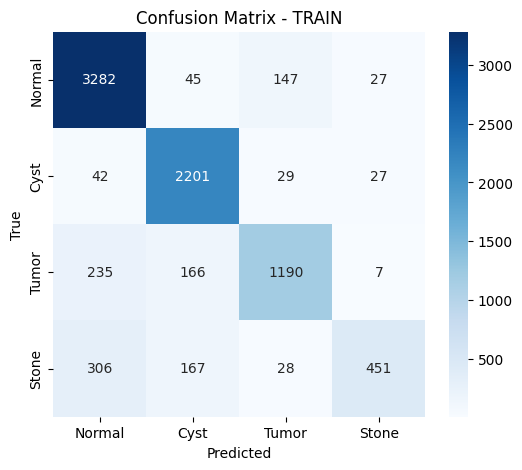

In [ ]:
train_labels, train_preds = get_predictions(cnn_model, train_loader)
train_acc = accuracy_score(train_labels, train_preds)

print(f"=== Evaluasi di Train Set ===")
print("Akurasi - TRAIN: {train_acc:.4f}")
print("\nClassification Report - TRAIN:")
print(classification_report(train_labels, train_preds,
                            target_names=list(idx2label.values())))

plot_confusion_matrix(train_labels, train_preds,
                      "Confusion Matrix - TRAIN")

##### A2. Evaluasi Val Set

=== Evaluasi di Validation Set ===
Akurasi - VAL: {val_acc:.4f}

Classification Report - VAL:
              precision    recall  f1-score   support

      Normal       0.86      0.93      0.89       750
        Cyst       0.82      0.97      0.89       492
       Tumor       0.83      0.72      0.77       343
       Stone       0.89      0.47      0.61       204

    accuracy                           0.85      1789
   macro avg       0.85      0.77      0.79      1789
weighted avg       0.85      0.85      0.84      1789



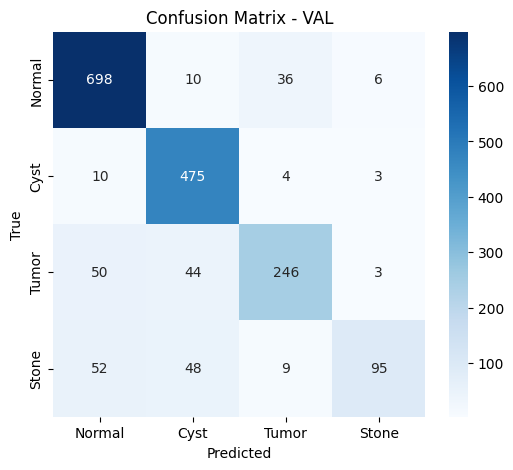

In [ ]:
val_labels, val_preds = get_predictions(cnn_model, val_loader)
val_acc = accuracy_score(val_labels, val_preds)

print(f"=== Evaluasi di Validation Set ===")
print("Akurasi - VAL: {val_acc:.4f}")
print("\nClassification Report - VAL:")
print(classification_report(val_labels, val_preds,
                            target_names=list(idx2label.values())))

plot_confusion_matrix(val_labels, val_preds,
                      "Confusion Matrix - VAL")

##### A3. Evaluasi Test Set

=== Evaluasi di Test Set ===
Akurasi - TEST: {test_acc:.4f}

Classification Report - TEST:
              precision    recall  f1-score   support

      Normal       0.84      0.95      0.89       751
        Cyst       0.85      0.95      0.90       493
       Tumor       0.86      0.71      0.78       342
       Stone       0.83      0.44      0.58       204

    accuracy                           0.85      1790
   macro avg       0.85      0.76      0.79      1790
weighted avg       0.85      0.85      0.83      1790



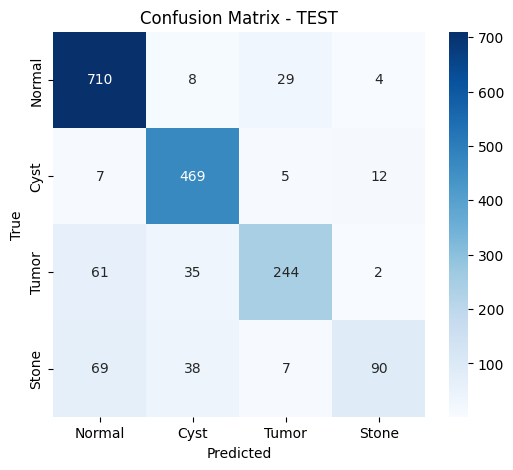

In [ ]:
test_labels, test_preds = get_predictions(cnn_model, test_loader)
test_acc = accuracy_score(test_labels, test_preds)

print(f"=== Evaluasi di Test Set ===")
print("Akurasi - TEST: {test_acc:.4f}")
print("\nClassification Report - TEST:")
print(classification_report(test_labels, test_preds,
                            target_names=list(idx2label.values())))

plot_confusion_matrix(test_labels, test_preds,
                      "Confusion Matrix - TEST")

#### G. Evaluasi (Kurva Accuracy-Loss, ROC One vs Rest)

##### A1. Kurva Training (Accuracy & Loss)

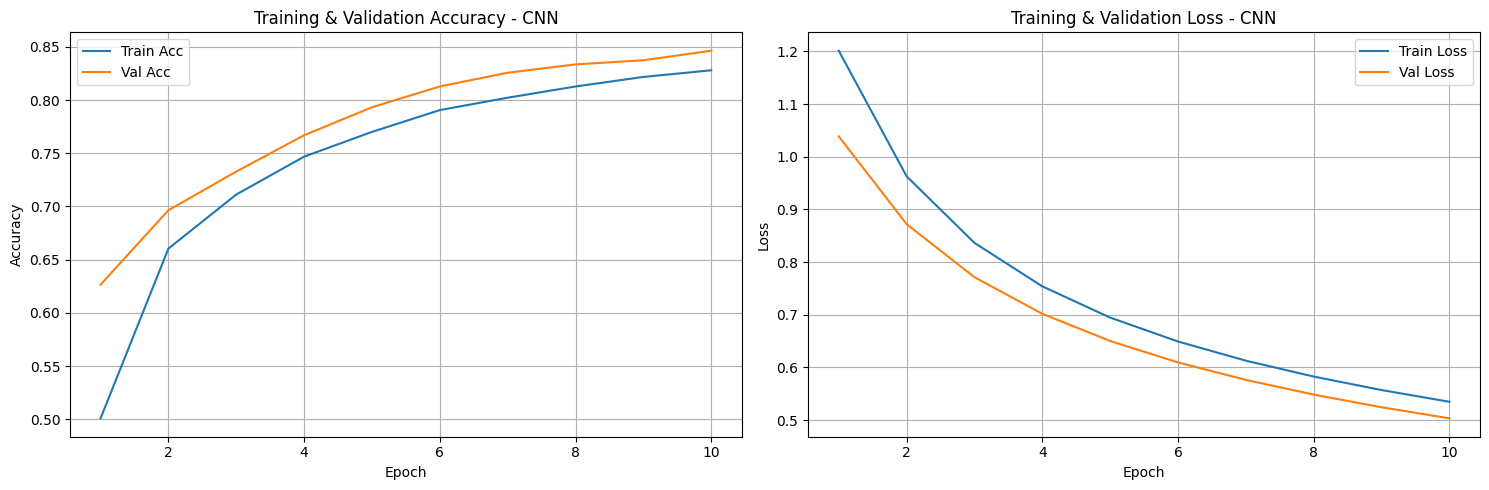

In [ ]:
epochs_c = range(1, EPOCHS_CNN + 1)

plt.figure(figsize=(15, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_c, train_accs_cnn, label="Train Acc")
plt.plot(epochs_c, val_accs_cnn, label="Val Acc")
plt.title("Training & Validation Accuracy - CNN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_c, train_losses_cnn, label="Train Loss")
plt.plot(epochs_c, val_losses_cnn, label="Val Loss")
plt.title("Training & Validation Loss - CNN")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### A2. Kurva ROC One vs Rest

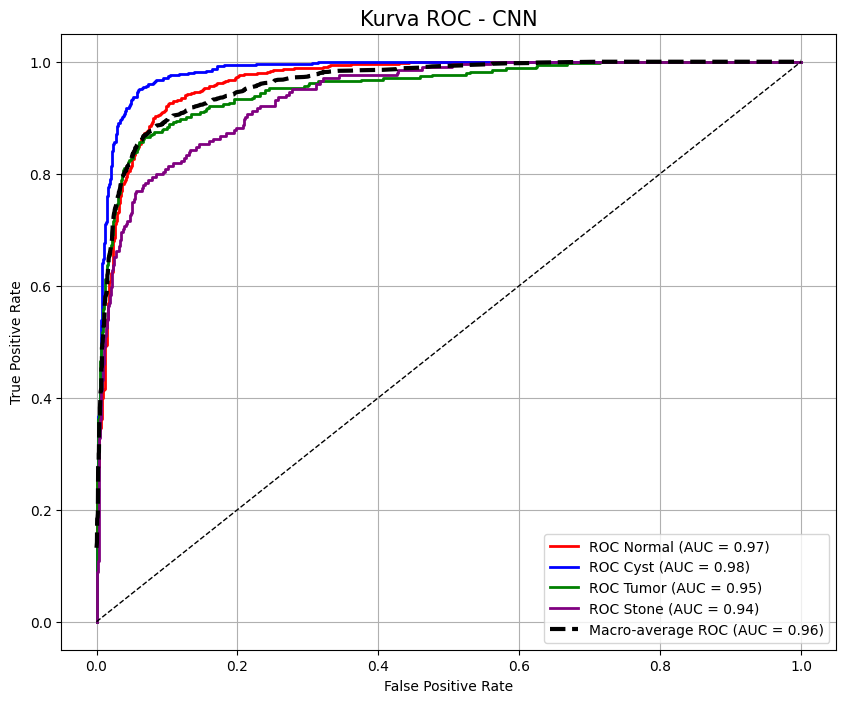

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Kumpulkan semua label dari test_loader
all_labels_test = []

for _, labels in test_loader:
    all_labels_test.extend(labels.numpy())

all_labels_test = np.array(all_labels_test)

# Binarize Label
test_labels_bin = label_binarize(all_labels_test, classes=list(range(len(idx2label))))
n_classes = test_labels_bin.shape[1]

# Probabilitas CNN
probs = []

cnn_model.eval()
with torch.no_grad():
    for imgs, _ in test_loader:
        imgs = imgs.to(device)
        out = cnn_model(imgs)
        probs.extend(torch.softmax(out, dim=1).cpu().numpy())

probs = np.array(probs)

# Hitung ROC Tiap Kelas
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro Average ROC
# Gabungkan semua FPR
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolasi TPR
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
macro_auc = auc(all_fpr, mean_tpr)


# Plot ROC Curve
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'purple']

# ROC per kelas
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2, color=color,
             label=f"ROC {idx2label[i]} (AUC = {roc_auc[i]:.2f})")

# ROC macro-average
plt.plot(all_fpr, mean_tpr, color="black", lw=3, linestyle="--",
         label=f"Macro-average ROC (AUC = {macro_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)

plt.title("Kurva ROC - CNN", fontsize=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


---

### Persiapan Membuat Deployment

In [ ]:
import torch

torch.save(cnn_model.state_dict(), 'model_kidney.pth')

print("✅ Model berhasil disimpan!'model_kidney.pth'.")

✅ Model berhasil disimpan!'model_kidney.pth'.


## <div align="center"> Conclusion </div>

### Enter Your Conclusion Here:

Pertemuan hari ini kita mencoba untuk melakukan evaluation & deployment proyek akhir mata kuliah Data Analysis yang telah diselesaikan pembuatan modelnya.

**LINK:**

https://kidney-ct-scan-classification.streamlit.app/

**Demo Website:**

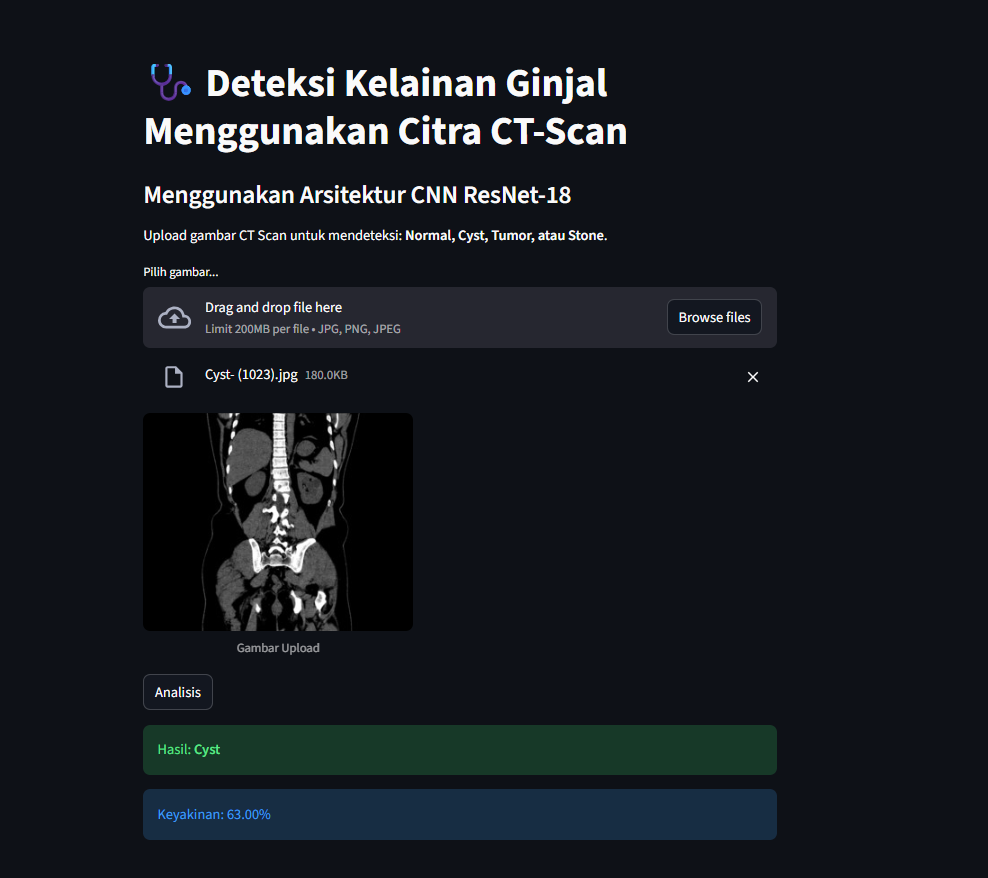

---


## <div align="center"> Reference </div>

### Input Your Reference Here  (Jika ada):


https://streamlit.io/

---